# Sentiment Analysis on IMDB Dataset

In [1]:
import pandas as pd
import numpy as np

## Analyzing the dataset

In [23]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

In [24]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [25]:
len(df["sentiment"])

50000

In [26]:
df["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [27]:
document = []
for i in range(len(df['sentiment'])):
    document.append([df['review'][i] , df['sentiment'][i]])

print(document[0][0])
print(document[0][1])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

## Preparing Dataset for further use

### Cleaning Data

* removing stop words
* doing lemmitization

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet


from nltk.tokenize import word_tokenize 
from nltk import pos_tag
import string

[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/corpora/wordnet/README  
  inflating: /kaggle/working/corpora/wordnet/index.sense  
  inflating: /kaggle/working/corpora/wordnet/data.

In [34]:
lemmatizer = WordNetLemmatizer()

def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [35]:
stops = stopwords.words("english") + list(string.punctuation)
print(stops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [43]:
def clean_review(text):
    output_words = []
    words = word_tokenize(text)
    for w in words:
        if w.lower() not in stops:
            # now as this is not a stop word so we will do further processing bro
            pos = pos_tag([w]) # don't lower w here as it affects the pos so as it is we have to pass , also as seen above we give it as a list bro
            cleaned_word = lemmatizer.lemmatize(w,pos = get_simple_pos(pos[0][1]))
            output_words.append(cleaned_word)# can do lower now as kaam to ho gaya bro
            
            output = " ".join(output_words)
    return output

In [44]:
d = clean_review(document[0][0])
d

"One reviewer mention watch 1 Oz episode 'll hooked right exactly happen me. br br first thing struck Oz brutality unflinching scene violence set right word GO Trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word. br br call OZ nickname give Oswald Maximum Security State Penitentary focus mainly Emerald City experimental section prison cell glass front face inwards privacy high agenda Em City home many..Aryans Muslims gangsta Latinos Christians Italians Irish ... .so scuffle death stare dodgy dealing shady agreement never far away. br br would say main appeal show due fact go show would n't dare Forget pretty picture paint mainstream audience forget charm forget romance ... OZ n't mess around first episode ever saw struck nasty surreal could n't say ready watch developed taste Oz get accustom high level graphic violence violence injustice crooked guard 'll sell nickel inmate 'll kill order get away well mannered middle class inmate turn pris

In [46]:
documents = [(clean_review(d),category) for d,category in document]

In [64]:
len(documents)

50000

In [2]:
cleanedData = pd.DataFrame(documents,columns=["cleaned_text","category"])
     
# saving the dataframe
cleanedData.to_csv('IMDB_cleanedData.csv')

NameError: name 'documents' is not defined

In [86]:
documents = np.array(documents)

print(documents.shape)

(50000, 2)


In [108]:
print(documents[0,0])
print()
print(documents[0,1])

One reviewer mention watch 1 Oz episode 'll hooked right exactly happen me. br br first thing struck Oz brutality unflinching scene violence set right word GO Trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word. br br call OZ nickname give Oswald Maximum Security State Penitentary focus mainly Emerald City experimental section prison cell glass front face inwards privacy high agenda Em City home many..Aryans Muslims gangsta Latinos Christians Italians Irish ... .so scuffle death stare dodgy dealing shady agreement never far away. br br would say main appeal show due fact go show would n't dare Forget pretty picture paint mainstream audience forget charm forget romance ... OZ n't mess around first episode ever saw struck nasty surreal could n't say ready watch developed taste Oz get accustom high level graphic violence violence injustice crooked guard 'll sell nickel inmate 'll kill order get away well mannered middle class inmate turn priso

### Converting into word embeddings

In [24]:
count_vec = CountVectorizer(max_features = 3000 , max_df=0.85 , min_df = 0.10)

In [25]:
data = pd.read_csv('/kaggle/input/contains-the-cleaned-dataset-for-imdb-analysis/IMDB_cleanedData.csv')
data.head()

,Unnamed: 0,cleaned_text,category
0,0,One reviewer mention watch 1 Oz episode 'll ho...,positive
1,1,wonderful little production br br film techniq...,positive
2,2,thought wonderful way spend time hot summer we...,positive
3,3,Basically 's family little boy Jake think 's z...,negative
4,4,Petter Mattei 's `` Love Time Money '' visuall...,positive


In [26]:
from sklearn.model_selection import train_test_split

# xTrain,xTest,yTrain,yTest = train_test_split(documents[:,0],documents[:,1] , random_state = 0)

xTrain,xTest,yTrain,yTest = train_test_split(data["cleaned_text"],data["category"] , random_state = 0)

In [27]:
print(len(xTrain))

37500


In [28]:
xTrain = count_vec.fit_transform(xTrain)

In [29]:
count_vec.get_feature_names_out()

array(['10', 'act', 'actor', 'actually', 'almost', 'also', 'always',
       'another', 'around', 'back', 'bad', 'begin', 'believe', 'best',
       'big', 'bit', 'br', 'ca', 'cast', 'character', 'come', 'comedy',
       'could', 'day', 'director', 'do', 'end', 'enjoy', 'enough', 'even',
       'ever', 'every', 'fact', 'fan', 'far', 'feel', 'film', 'find',
       'first', 'funny', 'get', 'girl', 'give', 'go', 'good', 'great',
       'guy', 'however', 'interest', 'know', 'last', 'least', 'life',
       'like', 'line', 'little', 'long', 'look', 'lot', 'love', 'make',
       'man', 'many', 'may', 'minute', 'movie', 'much', 'must', 'need',
       'never', 'new', 'nothing', 'old', 'one', 'part', 'people',
       'performance', 'play', 'plot', 'point', 'pretty', 'put', 'quite',
       're', 'real', 'really', 'right', 'role', 'saw', 'say', 'scene',
       'script', 'see', 'seem', 'set', 'show', 'something', 'star',
       'start', 'still', 'story', 'take', 'tell', 'thing', 'think',
       'thou

In [30]:
xTest = count_vec.transform(xTest)

## Training and comparing Models

### SVM

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()

svc.fit(xTrain,yTrain)

SVC()

In [15]:
ypred = svc.predict(xTest)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(yTest, ypred)

0.75816

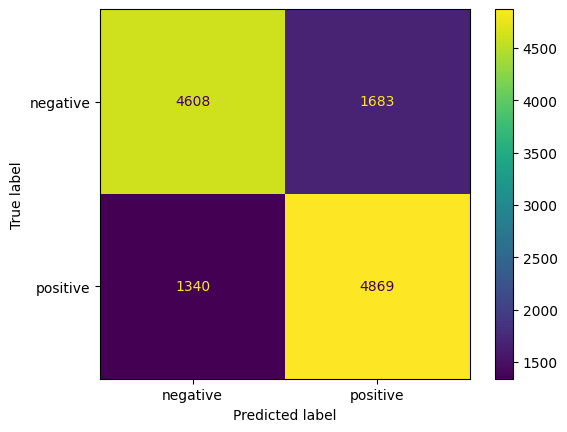

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(yTest, ypred, labels=list(set(yTrain)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(set(yTrain)))
disp.plot()
plt.show()

### Gaussian Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

In [26]:
A = xTrain.todense()

In [28]:
clf = GaussianNB()
clf.fit(np.asarray(A),yTrain)

GaussianNB()

In [30]:
ypred = clf.predict(np.asarray(xTest.todense()))

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(yTest, ypred)

0.72512

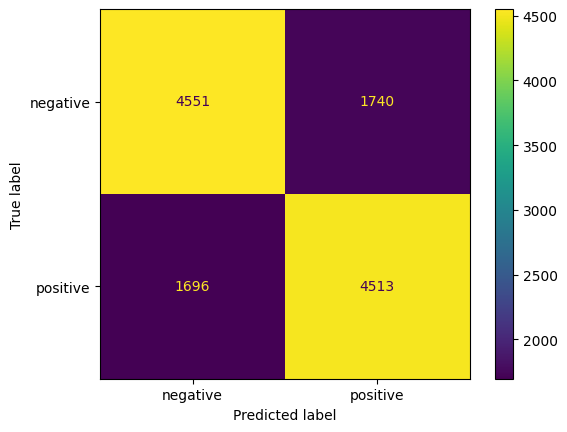

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(yTest, ypred, labels=list(set(yTrain)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(set(yTrain)))
disp.plot()
plt.show()

### Multinomial Naive Bayes

In [33]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
clf = MultinomialNB()
clf.fit(np.asarray(xTrain.todense()),yTrain)

MultinomialNB()

In [35]:
ypred = clf.predict(np.asarray(xTest.todense()))

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(yTest, ypred)

0.7416

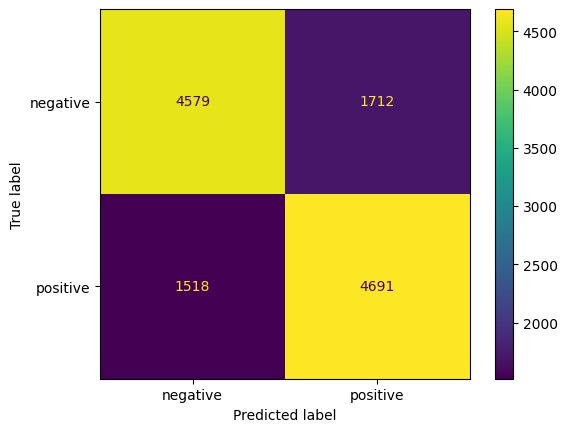

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(yTest, ypred, labels=list(set(yTrain)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(set(yTrain)))
disp.plot()
plt.show()

### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [39]:
clf.fit(xTrain,yTrain)

DecisionTreeClassifier(random_state=0)

In [40]:
ypred = clf.predict(xTest)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(yTest, ypred)

0.64264

### Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)

In [43]:
clf.fit(xTrain,yTrain)

RandomForestClassifier(max_depth=2, random_state=0)

In [44]:
ypred = clf.predict(xTest)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(yTest, ypred)

0.71208

### using Multilayer Perceptron Network

In [31]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense,Dropout,Input

In [32]:
print(xTrain.shape)

xTrain.todense()[:3]

(37500, 126)


matrix([[0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
         0, 1, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0,
         0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0,
         0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
         0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1],
        [0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
         3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,

In [33]:
model = Sequential()
model.add(Input(shape=(xTrain.todense().shape[1],)))
model.add(Dense(128,activation = 'tanh'))
model.add(Dense(512,activation = 'tanh'))
model.add(Dropout(0.5))
model.add(Dense(256,activation = 'tanh'))
model.add(Dropout(0.4))
model.add(Dense(128,activation = 'sigmoid'))
model.add(Dense(1,activation = 'sigmoid'))

In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │        16,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,889 (835.50 KB)

 Trainable params: 213,889 (835.50 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer = 'adam',metrics = ['accuracy'],loss='binary_crossentropy')

In [36]:
def convertCategory(x):
    if x=='positive':
        return 1
    else:
        return 0

y_train = [convertCategory(y) for y in yTrain]
y_test = [convertCategory(y) for y in yTest]

print(len(y_train))

y_train = np.array(y_train,dtype=np.float32)
y_test = np.array(y_test,dtype=np.float32)

print(y_train.shape)

37500
(37500,)


In [37]:
print(np.array(xTrain.todense()).shape)

x_train = np.array(xTrain.todense(),dtype=np.float32)
x_test = np.array(xTest.todense(),dtype=np.float32)

x_test.shape

(37500, 126)


(12500, 126)

In [38]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range =(0,1))
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [39]:
model.fit(x_train,y_train,epochs = 60,batch_size = 32,verbose = 1)

Epoch 1/60
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7066 - loss: 0.5701
Epoch 2/60
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7604 - loss: 0.4942
Epoch 3/60
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7656 - loss: 0.4870
Epoch 4/60
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7625 - loss: 0.4890
Epoch 5/60
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7675 - loss: 0.4811
Epoch 6/60
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7650 - loss: 0.4803
Epoch 7/60
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7678 - loss: 0.4717
Epoch 8/60
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7770 - loss: 0.4671
Epoch 9/60
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7766 - loss: 0.4622
Epoch 10/60
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7785 - loss: 0.4570
Epoch 11/60
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7850 - loss: 0.4432
Epoch 12/60
1172/1172 ━━━━━━━━

In [40]:
model.evaluate(x_test,y_test)

391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7048 - loss: 1.2926


[1.2919634580612183, 0.7024000287055969]

### using lstm and rnn to predict

* Here we can't use the usuall word vectors which we made earlier
* We have tokenize the words and then use them 
* so let's start from the cleaned data only 

In [3]:
data = pd.read_csv('/kaggle/input/contains-the-cleaned-dataset-for-imdb-analysis/IMDB_cleanedData.csv')

In [4]:
data.head()

,Unnamed: 0,cleaned_text,category
0,0,One reviewer mention watch 1 Oz episode 'll ho...,positive
1,1,wonderful little production br br film techniq...,positive
2,2,thought wonderful way spend time hot summer we...,positive
3,3,Basically 's family little boy Jake think 's z...,negative
4,4,Petter Mattei 's `` Love Time Money '' visuall...,positive


In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2024-06-28 10:12:02.605745: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-28 10:12:02.605853: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-28 10:12:02.763371: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
#initialize the tokenizer, which can work char by char
tokenizer = Tokenizer(oov_token='<UNK>',num_words = 5000)

In [7]:
def convertCategory(a):
    if(a=='positive'):
        return 1
    else:
        return 0
    
x = np.array(data["cleaned_text"])
y = np.array([convertCategory(a) for a in data["category"]])

print(x.shape)
print(y.shape)

(50000,)
(50000,)


In [8]:
from sklearn.model_selection import train_test_split

xTrain,xTest,yTrain,yTest = train_test_split(x,y,random_state = 0)

In [9]:
yTrain.shape

(37500,)

In [10]:
yTrain[:20]

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0])

In [11]:
tokenizer.fit_on_texts(xTrain)

In [12]:
vocab_size = len(tokenizer.word_index)+1

print(vocab_size)

87556


In [13]:
X_train = pad_sequences(tokenizer.texts_to_sequences(xTrain), maxlen=250)
X_test = pad_sequences(tokenizer.texts_to_sequences(xTest), maxlen=250)

In [14]:
X_train.shape

(37500, 250)

In [15]:
X_test.shape

(12500, 250)

In [16]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,   22,   48,  537,  824,   27,   35,
         67,  255,   65, 1441, 1647,    1, 1587,   86,  198,    1,  432,
          1,  824,    1, 3941,    1,   18, 4669, 4766,  125,    1, 2142,
        934, 1022, 4734,  125,  780,  236,    1,    1,  334,    3,  779,
          1,    5, 1023,    4,   12,  475,  193,   

In [17]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import LSTM,Dense,Embedding

In [18]:
model = Sequential()
model.add(Embedding(input_dim =5000, output_dim = 128, input_length = 250))
model.add(LSTM(128, dropout=0.2, recurrent_dropout = 0.2,return_sequences=True))
model.add(LSTM(128, dropout=0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = "sigmoid"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer = "adam", loss="binary_crossentropy", metrics=["accuracy"])

In [23]:
model.fit(X_train, yTrain, epochs = 1, batch_size = 64, validation_split = 0.2)

469/469 ━━━━━━━━━━━━━━━━━━━━ 329s 701ms/step - accuracy: 0.8179 - loss: 0.4096 - val_accuracy: 0.8555 - val_loss: 0.3389


In [24]:
model.save("modelLstm1.keras")

In [25]:
model.fit(X_train, yTrain, epochs = 1, batch_size = 64, validation_split = 0.2)

469/469 ━━━━━━━━━━━━━━━━━━━━ 329s 702ms/step - accuracy: 0.8803 - loss: 0.3008 - val_accuracy: 0.8600 - val_loss: 0.3240


In [32]:
model.save("modelLstm2.keras")

In [33]:
model.fit(X_train, yTrain, epochs = 1, batch_size = 64, validation_split = 0.2)

469/469 ━━━━━━━━━━━━━━━━━━━━ 331s 705ms/step - accuracy: 0.9062 - loss: 0.2418 - val_accuracy: 0.8680 - val_loss: 0.3216


In [34]:
model.save("modelLstm3.keras")

In [35]:
loss, accuracy = model.evaluate(X_test, yTest)

391/391 ━━━━━━━━━━━━━━━━━━━━ 68s 174ms/step - accuracy: 0.8629 - loss: 0.3364


In [36]:
def predictive_system(review):
  sequences = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequences, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [37]:
predictive_system("This movie was fantastic and amazing")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


'positive'

In [38]:
predictive_system("A trilling adventure with stunning visual")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


'positive'

In [39]:
predictive_system("Overall long and slow very bad")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


'negative'